In [1]:
import scanpy as sc
import pandas as pd

In [2]:
adata = sc.read_h5ad('Rd13_Data_post_filtering_cell_types-reseq.h5ad.gzip')

In [3]:
adata

AnnData object with n_obs × n_vars = 29208 × 5288
    obs: 'sgRNA', 'misc:umi_count', 'condition', 'chip_lane', 'target', 'is_nt', 'moi', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'rep', 'n_counts', 'leiden', 'cell_type', 'umap_density_condition', 'umap_density_target'
    uns: 'condition_colors', 'umap_density_condition_params', 'umap_density_target_params'
    obsm: 'X_pca', 'X_umap'

In [15]:
adata.obs['UMAP_X'] = adata.obsm['X_umap'][:,0]
adata.obs['UMAP_Y'] = adata.obsm['X_umap'][:,1]

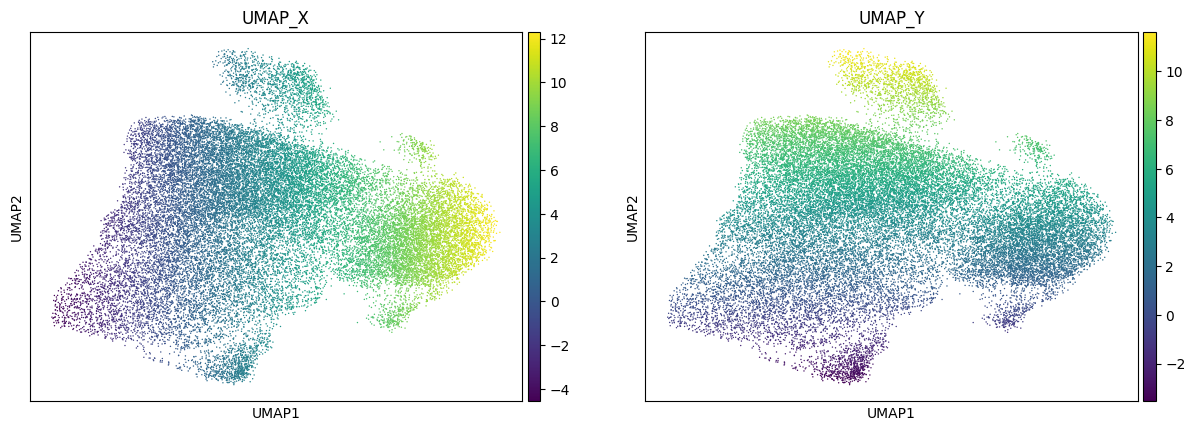

In [16]:
sc.pl.umap(adata,color = ['UMAP_X','UMAP_Y'])

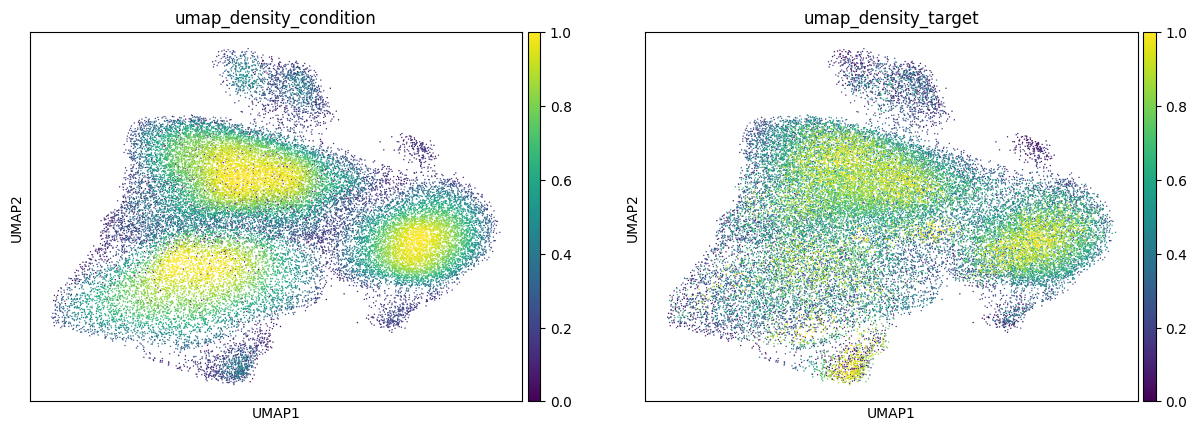

In [20]:
sc.pl.umap(adata,color = ['umap_density_condition','umap_density_target'])

In [27]:
adata.obs.to_csv('final_adata_obs.csv')

In [43]:
adata.to_df().to_csv('final_adata_X.csv')

In [44]:
adata

AnnData object with n_obs × n_vars = 29208 × 5288
    obs: 'sgRNA', 'misc:umi_count', 'condition', 'chip_lane', 'target', 'is_nt', 'moi', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'rep', 'n_counts', 'leiden', 'cell_type', 'umap_density_condition', 'umap_density_target', 'UMAP_X', 'UMAP_Y'
    uns: 'condition_colors', 'umap_density_condition_params', 'umap_density_target_params'
    obsm: 'X_pca', 'X_umap'

In [ ]:
adata

In [55]:
sc.tl.rank_genes_groups(adata, groupby = 'cell_type', groups='all', reference='rest', pts = True )

In [56]:
mat = sc.get.rank_genes_groups_df(adata,group = None, pval_cutoff=None, log2fc_min=None, log2fc_max=None, gene_symbols=None)

In [57]:
mat

,group,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference
0,Deactivated myofibroblasts,Pmepa1,61.117657,1.072589,0.000000e+00,0.000000e+00,0.999506,0.993747
1,Deactivated myofibroblasts,Tgfb1,57.461720,1.868244,0.000000e+00,0.000000e+00,0.973801,0.788560
2,Deactivated myofibroblasts,Hbegf,52.394394,1.723929,0.000000e+00,0.000000e+00,0.991102,0.894648
3,Deactivated myofibroblasts,Srpx2,39.385448,1.794653,4.134696e-257,8.097880e-255,0.838853,0.545889
4,Deactivated myofibroblasts,Il11,38.561584,2.698451,1.266077e-247,2.028793e-245,0.882353,0.592422
...,...,...,...,...,...,...,...,...
58163,Transitory,Tgfb1,-59.570171,-1.321857,0.000000e+00,0.000000e+00,0.657737,0.828702
58164,Transitory,Slc20a1,-60.291798,-1.567305,0.000000e+00,0.000000e+00,0.531719,0.724106
58165,Transitory,Il11,-63.622364,-2.229630,0.000000e+00,0.000000e+00,0.425204,0.648113
58166,Transitory,Ptgs2,-84.571541,-2.215551,0.000000e+00,0.000000e+00,0.546292,0.782577
